In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, ee, geemap, rasterio
from glob import glob
from osgeo import gdal, gdalconst
from rasterio.plot import show
import rioxarray as rxr
from rio_cogeo.profiles import cog_profiles
from rasterio.merge import merge


In [2]:
#ee.Authenticate()
ee.Initialize()

In [3]:
cwd = os.getcwd()
dat_dir = os.path.join(cwd, 'Data')

In [9]:
#'EPSG:32750' UTM
#'EPSG:4326' WGS84
#'EPSG:4283' GDA 94
#'EPSG:28350' MGA Zone 50
dirs = glob(dat_dir +'/*/' , recursive = True)
matches = []
for match in dirs:
    if "South West" in match or 'Metro' in match:
        matches.append(match)
        
for folder in matches:
    subdir = glob(folder +'/*/' , recursive = True)
    files_to_mosaic = glob(folder + '/*.tif')
    xres=5
    yres=5
    NODATA_VALUE = -9999
    aff = subdir[0].split('\\')[-3]
    aff_spl = aff.split(' ')
    if len(aff_spl) > 1:
        aff_up = "_".join(aff_spl)
    else:
        aff_up = aff
        
    res = (
        gdal.Warp(subdir[0] + aff_up + '.tif' , files_to_mosaic, srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:28350',srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE ,
                 xRes=xres, yRes=yres, resampleAlg=gdalconst.GRA_Cubic)
        )
    res = None
    

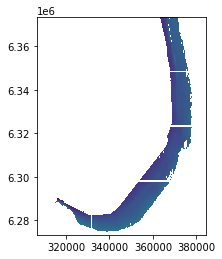

<AxesSubplot:>

In [10]:
SW_path = os.path.join(dat_dir, 'South West\\South West mosaic\\South_West.tif')
bath_SW = rasterio.open(SW_path)
show(bath_SW)

In [13]:
#0.000050
sw_out = os.path.join(dat_dir, 'South West\\South West mosaic\\WGS84\\South_West_wgs.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(sw_out , SW_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                  resampleAlg=gdalconst.GRA_Cubic)
        )

res = None

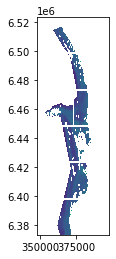

<AxesSubplot:>

In [14]:
met_path = os.path.join(dat_dir, 'Metro\\Metro mosaic\\Metro.tif')
bath_met = rasterio.open(met_path)
show(bath_met)

In [16]:
#0.000050
met_out = os.path.join(dat_dir, 'Metro\\Metro mosaic\\WGS84\\Metro_wgs.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(met_out , met_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 resampleAlg=gdalconst.GRA_Cubic)
        )

res = None

In [18]:
cog_sw = os.path.join(dat_dir, 'South West\\South West mosaic\\WGS84\\COG\\South_West.tif')
geemap.image_to_cog(sw_out, cog_sw)
geemap.cog_validate(cog_sw, verbose=True)

In [20]:
cog_met = os.path.join(dat_dir, 'Metro\\Metro mosaic\\WGS84\\COG\\South_West.tif')
geemap.image_to_cog(met_out, cog_met)
geemap.cog_validate(cog_met, verbose=True)

In [ ]:
#0.000050
tr_path = os.path.join(dat_dir, 'Metro\\TwoRocks_5m.tif')
tr_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\TwoRocks_wgs84.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(tr_out , tr_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                  resampleAlg=gdalconst.GRA_Cubic)
        )

res = None

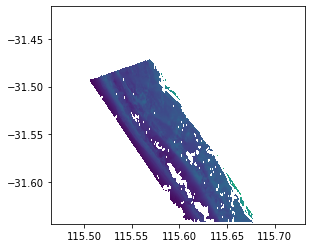

<AxesSubplot:>

In [24]:
bath_tr = rasterio.open(tr_out)
show(bath_tr)

In [25]:
cog_tr = os.path.join(dat_dir, 'Test COGs\\COGs\\TwoRocks.tif')
geemap.image_to_cog(tr_out, cog_tr)
geemap.cog_validate(cog_tr, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\TwoRocks_wgs84.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\TwoRocks.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\TwoRocks.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=5449, Height=4668, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(115.46554386886838, -31.64413046405512, 115.73210433458497, -31.415775856977657), Origin=(115.46554386886838, -31.415775856977657), Resolution=(4.8919153187117034e-05, -4.8919153187117034e-05), MinZoom=10, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=5449, Height=46